In [76]:
!pip install folium mapclassify geopandas

Defaulting to user installation because normal site-packages is not writeable


In [77]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning) 

In [78]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import pandas as pd

In [79]:
!git clone https://github.com/yezongyang/china-geojson.git

fatal: destination path 'china-geojson' already exists and is not an empty directory.


In [80]:
gdf = gpd.read_file("china-geojson/china.json")
df = pd.read_csv("Provinces_of_China.csv")

gdf = pd.merge(gdf, df[["name", "Province", "Population"]], on="name", how="left")
gdf

,id,size,name,childNum,geometry,Province,Population
0,65,550,新疆维吾尔自治区,18,"POLYGON ((96.41600 42.75880, 96.41600 42.71480...",Xinjiang,25852345
1,54,550,西藏自治区,7,"POLYGON ((79.01370 34.32130, 79.10160 34.45310...",Tibet,3648100
2,15,450,内蒙古自治区,12,"POLYGON ((97.20700 42.80270, 99.49220 42.58300...",Inner Mongolia,24049155
3,63,800,青海省,8,"POLYGON ((89.73630 36.07910, 89.91210 36.07910...",Qinghai,5923957
4,51,900,四川省,21,"POLYGON ((101.77730 33.53030, 101.86520 33.574...",Sichuan,83674866
5,23,700,黑龙江省,13,"POLYGON ((121.46480 53.34960, 123.66210 53.569...",Heilongjiang,31850088
6,62,690,甘肃省,14,"POLYGON ((96.41600 42.71480, 97.20700 42.80270...",Gansu,25019831
7,53,1200,云南省,16,"POLYGON ((98.17380 28.12500, 98.26170 28.38870...",Yunnan,47209277
8,45,1450,广西壮族自治区,14,"POLYGON ((104.50200 24.74120, 104.67770 24.609...",Guangxi,50126804
9,43,1700,湖南省,14,"POLYGON ((109.24800 28.47660, 109.24800 29.135...",Hunan,66444864


In [81]:
gdf['centroid'] = gdf['geometry'].centroid
gdf['latitude'] = gdf['centroid'].y
gdf['longitude'] = gdf['centroid'].x
gdf

,id,size,name,childNum,geometry,Province,Population,centroid,latitude,longitude
0,65,550,新疆维吾尔自治区,18,"POLYGON ((96.41600 42.75880, 96.41600 42.71480...",Xinjiang,25852345,POINT (85.19264 41.12289),41.122889,85.192642
1,54,550,西藏自治区,7,"POLYGON ((79.01370 34.32130, 79.10160 34.45310...",Tibet,3648100,POINT (88.43673 31.48823),31.488233,88.436733
2,15,450,内蒙古自治区,12,"POLYGON ((97.20700 42.80270, 99.49220 42.58300...",Inner Mongolia,24049155,POINT (113.92912 44.08810),44.088099,113.929122
3,63,800,青海省,8,"POLYGON ((89.73630 36.07910, 89.91210 36.07910...",Qinghai,5923957,POINT (96.03436 35.65830),35.658295,96.034364
4,51,900,四川省,21,"POLYGON ((101.77730 33.53030, 101.86520 33.574...",Sichuan,83674866,POINT (102.70151 30.62681),30.626806,102.701507
5,23,700,黑龙江省,13,"POLYGON ((121.46480 53.34960, 123.66210 53.569...",Heilongjiang,31850088,POINT (127.77378 47.87188),47.871884,127.773781
6,62,690,甘肃省,14,"POLYGON ((96.41600 42.71480, 97.20700 42.80270...",Gansu,25019831,POINT (100.60275 37.88481),37.884813,100.602749
7,53,1200,云南省,16,"POLYGON ((98.17380 28.12500, 98.26170 28.38870...",Yunnan,47209277,POINT (101.49215 24.96036),24.960364,101.492148
8,45,1450,广西壮族自治区,14,"POLYGON ((104.50200 24.74120, 104.67770 24.609...",Guangxi,50126804,POINT (108.79660 23.80252),23.802516,108.796603
9,43,1700,湖南省,14,"POLYGON ((109.24800 28.47660, 109.24800 29.135...",Hunan,66444864,POINT (111.70496 27.61472),27.614723,111.704959


In [82]:
cities = gpd.read_file("cities.json")
cities

,Rank,City,Province,Latitude,Longitude,"Population, Urban Area","Population, City",geometry
0,1,Shanghai,Shanghai,31.232344,121.469102,28242646,22315474.0,POINT (121.46910 31.23234)
1,2,Beijing,Beijing,39.905714,116.391297,21167094,18960744.0,POINT (116.39130 39.90571)
2,3,Chongqing,Chongqing,29.565673,106.547919,16687404,7457599.0,POINT (106.54792 29.56567)
3,4,Tianjin,Tianjin,39.117549,117.191301,13929047,11090314.0,POINT (117.19130 39.11755)
4,5,Guangzhou,Guangdong,23.130196,113.259294,13839429,13965000.0,POINT (113.25929 23.13020)
...,...,...,...,...,...,...,...,...
413,414,Hailin,Heilongjiang,44.573346,129.381575,332717,85578.0,POINT (129.38157 44.57335)
414,415,Rushan,Shandong,36.913625,121.525514,332336,NaN,POINT (121.52551 36.91362)
415,416,Anning,Yunnan,24.837749,102.402683,330956,106795.0,POINT (102.40268 24.83775)
416,417,Rugao,Jiangsu,32.373466,120.569774,328336,257400.0,POINT (120.56977 32.37347)


In [83]:
def get_filters(excluded_provinces):
    if excluded_provinces == []:
        filter_gdf = (gdf["Province"] == gdf["Province"])
        filter_cities = (cities["Province"] == cities["Province"])
    else:
        filter_gdf = (gdf["Province"] != excluded_provinces[0])
        filter_cities = (cities["Province"] != excluded_provinces[0])
        for i in excluded_provinces[1:]:
            filter_gdf = (filter_gdf) & (gdf["Province"] != i)
            filter_cities = (filter_cities) & (cities["Province"] != i)
    return filter_gdf, filter_cities

In [99]:
def calculate_centers(excluded_provinces):
    filter_gdf, filter_cities = get_filters(excluded_provinces)
    centroid = gdf[filter_gdf].dissolve().centroid
    centroid_gdf = gpd.GeoDataFrame({"name": "Centroid", "geometry":[centroid[0]]})
    
    mean_center_lon = gdf[filter_gdf]["longitude"].mean()
    mean_center_lat = gdf[filter_gdf]["latitude"].mean()
    mean_center = gpd.GeoDataFrame({"name": "Mean center", "geometry":[Point(mean_center_lon, mean_center_lat)]})
    
    mean_weighted_lon = (gdf[filter_gdf]["Population"]*gdf[filter_gdf]["longitude"]).sum()/gdf[filter_gdf]["Population"].sum()
    mean_weighted_lat = (gdf[filter_gdf]["Population"]*gdf[filter_gdf]["latitude"]).sum()/gdf[filter_gdf]["Population"].sum()
    mean_weighted = gpd.GeoDataFrame({"name": "Mean weighted center", "geometry":[Point(mean_weighted_lon, mean_weighted_lat)]})
    
    mean_weighted_by_city_lon = (cities[filter_cities]["Population, City"]*cities[filter_cities]["Longitude"]).sum()/cities[filter_cities]["Population, City"].sum()
    mean_weighted_by_city_lat = (cities[filter_cities]["Population, City"]*cities[filter_cities]["Latitude"]).sum()/cities[filter_cities]["Population, City"].sum()
    mean_weighted_by_city = gpd.GeoDataFrame({"name": "Mean weighted center by city", "geometry":[Point(mean_weighted_by_city_lon, mean_weighted_by_city_lat)]})
    
    return centroid_gdf, mean_center, mean_weighted, mean_weighted_by_city

In [100]:
def explore_map(excluded_provinces=[]):
    filter_gdf, filter_cities = get_filters(excluded_provinces)
    centroid, mean_center, mean_weighted, mean_weighted_by_city = calculate_centers(excluded_provinces)
    m = gdf[filter_gdf].explore(color="grey", tooltip=False, width="80%", height="80%")
    m = gdf[filter_gdf]["centroid"].explore(m=m, color="orange")
    m = cities[filter_cities].explore(m=m)
    m = centroid.explore(m=m, color="red", marker_kwds=dict(radius=7, fill=True))
    m = mean_center.explore(m=m, color="green", marker_kwds=dict(radius=7, fill=True))
    m = mean_weighted.explore(m=m, color="blue", marker_kwds=dict(radius=7, fill=True))
    m = mean_weighted_by_city.explore(m=m, color="purple", marker_kwds=dict(radius=7, fill=True))
    return m 

In [101]:
def plot_map(excluded_provinces=[]):
    filter_gdf, filter_cities = get_filters(excluded_provinces)
    centroid, mean_center, mean_weighted, mean_weighted_by_city = calculate_centers(excluded_provinces)
    fig, ax = plt.subplots(figsize=(15, 8))
    ax = gdf[filter_gdf].boundary.plot(ax=ax, color="grey")
    ax = gdf[filter_gdf]["centroid"].plot(ax=ax, color="orange", markersize=10)
    ax = cities[filter_cities].plot(ax=ax, markersize=10)
    ax = centroid.plot(ax=ax, color="red")
    ax = mean_center.plot(ax=ax, color="green")
    ax = mean_weighted.plot(ax=ax, color="blue")
    ax = mean_weighted_by_city.plot(ax=ax, color="purple")
    return ax

# Con Taiwan y Hainan

In [102]:
explore_map()

<Axes: >

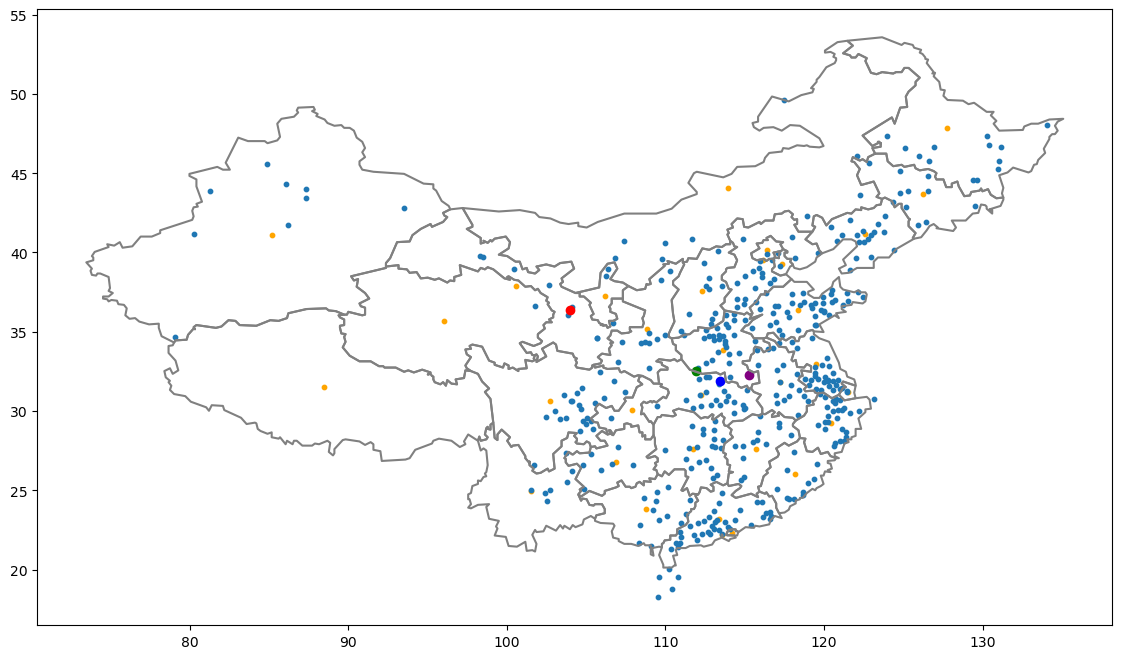

In [88]:
plot_map()

# Sin Taiwan ni Hainan

In [109]:
excluded = ["Taiwan", "Hainan"]
explore_map(excluded)

<Axes: >

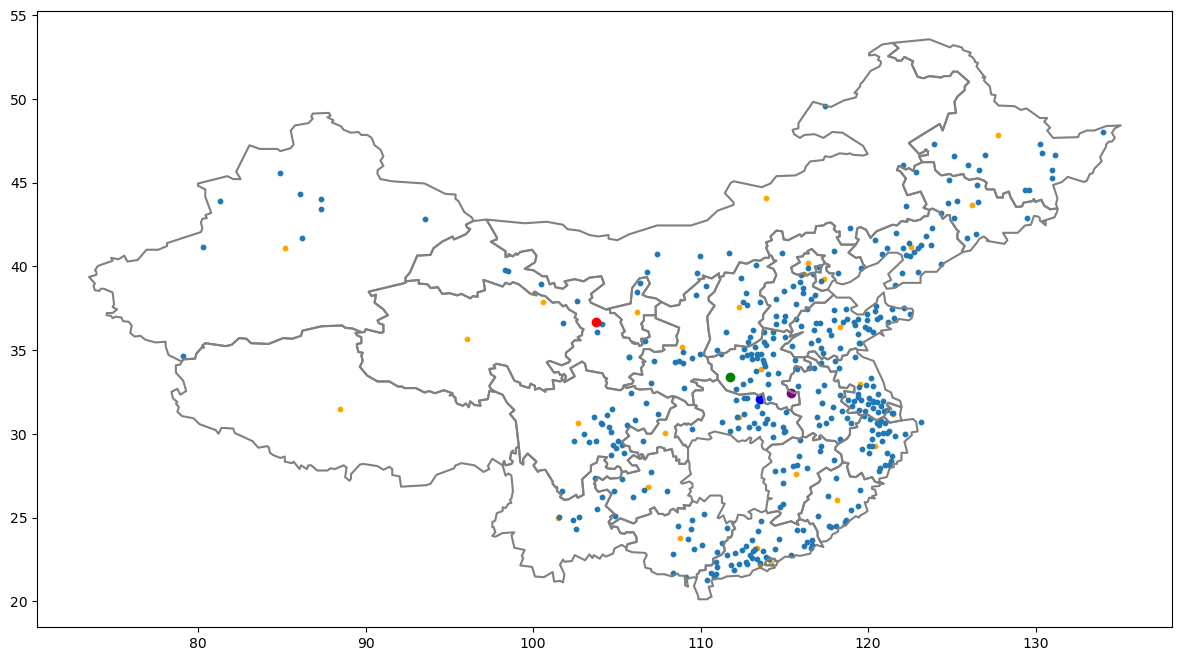

In [108]:
plot_map(excluded)